In [56]:
# Load dataset (space-separated, no header)
#Read file
lines <- readLines("/kaggle/input/boston-house-prices/housing.csv")

#  Parse lines safely
data_list <- lapply(lines, function(line) {
  nums <- unlist(strsplit(line, "\\s+"))   # split by one or more spaces
  nums <- nums[nums != ""]                 # remove empty strings
  as.numeric(nums[1:14])                   # keep exactly 14 numbers
})

#Combine into a matrix
data_matrix <- do.call(rbind, data_list)

# Convert to data frame
df <- as.data.frame(data_matrix)

# Assign correct column names
colnames(df) <- c(
  "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
)

# Check structure
str(df)
head(df)




'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [57]:
cat("Number of observations:", nrow(df), "\n")
cat("Number of variables:", ncol(df), "\n\n")

Number of observations: 506 
Number of variables: 14 



In [58]:
colSums(is.na(df))

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
      0       0       0       0       0       0       0       0       0       0 
PTRATIO       B   LSTAT    MEDV 
      0       0       0       0

In [59]:
#2.EDA

#2.1 Descriptive statistics

eda_summary <- df %>%
  summarise(across(
    everything(),
    list(
      mean = mean,
      sd   = sd,
      min  = min,
      q1   = ~quantile(.x, 0.25),
      med  = median,
      q3   = ~quantile(.x, 0.75),
      max  = max
    ),
    .names = "{.col}_{.fn}"
  ))

print(eda_summary)


  CRIM_mean  CRIM_sd CRIM_min  CRIM_q1 CRIM_med  CRIM_q3 CRIM_max  ZN_mean
1  3.613524 8.601545  0.00632 0.082045  0.25651 3.677083  88.9762 11.36364
     ZN_sd ZN_min ZN_q1 ZN_med ZN_q3 ZN_max INDUS_mean INDUS_sd INDUS_min
1 23.32245      0     0      0  12.5    100   11.13678 6.860353      0.46
  INDUS_q1 INDUS_med INDUS_q3 INDUS_max  CHAS_mean  CHAS_sd CHAS_min CHAS_q1
1     5.19      9.69     18.1     27.74 0.06916996 0.253994        0       0
  CHAS_med CHAS_q3 CHAS_max  NOX_mean    NOX_sd NOX_min NOX_q1 NOX_med NOX_q3
1        0       0        1 0.5546951 0.1158777   0.385  0.449   0.538  0.624
  NOX_max  RM_mean     RM_sd RM_min  RM_q1 RM_med  RM_q3 RM_max AGE_mean
1   0.871 6.284634 0.7026171  3.561 5.8855 6.2085 6.6235   8.78  68.5749
    AGE_sd AGE_min AGE_q1 AGE_med AGE_q3 AGE_max DIS_mean  DIS_sd DIS_min
1 28.14886     2.9 45.025    77.5 94.075     100 3.795043 2.10571  1.1296
    DIS_q1 DIS_med   DIS_q3 DIS_max RAD_mean   RAD_sd RAD_min RAD_q1 RAD_med
1 2.100175 3.20745 5.

In [60]:
#2.2 Histograms
pdf("histograms_all_variables.pdf", width = 10, height = 8)
par(mfrow = c(4, 4), mar = c(3, 3, 2, 1))
for (v in names(df)) {
  hist(df[[v]],
       main = v,
       xlab = "",
       col = "lightblue",
       border = "white")
}
dev.off()

png 
  2

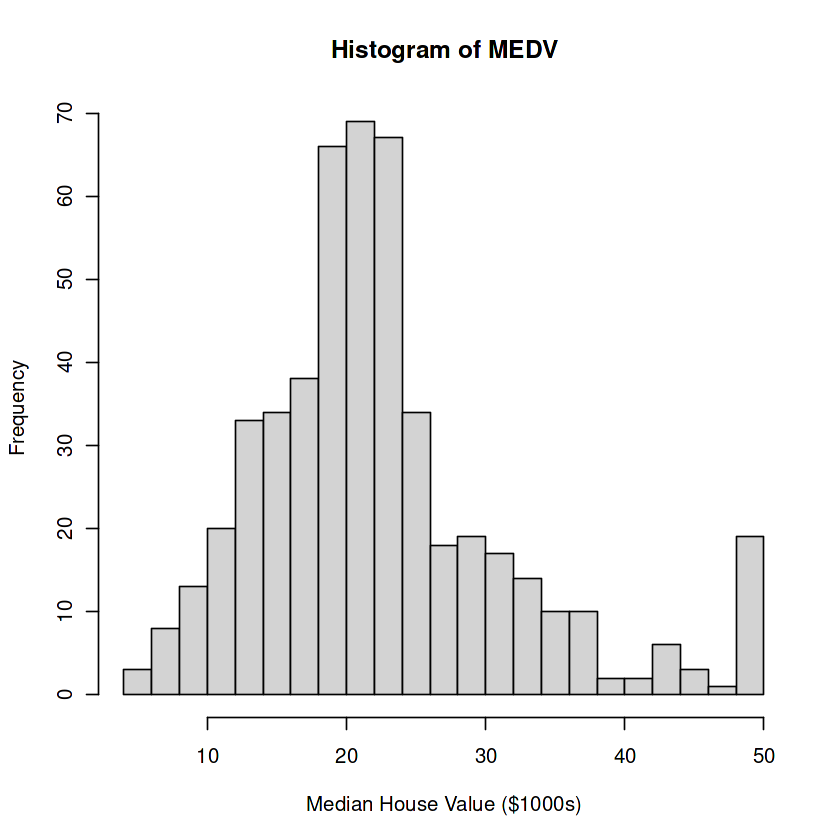

In [117]:
#2.3 Response skewness: log-transformation check
hist(df$MEDV, breaks = 30, col = "lightgray",
     main = "Histogram of MEDV",
     xlab = "Median House Value ($1000s)")

In [71]:
install.packages("corrplot")  # run once


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘corrplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [72]:
library(corrplot)


corrplot 0.92 loaded



In [118]:
#2.4 Correlation matrix
cor_mat <- cor(df)
sort(cor_mat[, "MEDV"], decreasing = TRUE)

pdf("correlation_matrix.pdf", width = 8, height = 8)
corrplot(cor_mat, method = "color", type = "lower",
         tl.col = "black", tl.srt = 45)
dev.off()

MEDV         RM         ZN          B        DIS       CHAS        AGE 
 1.0000000  0.6953599  0.3604453  0.3334608  0.2499287  0.1752602 -0.3769546 
       RAD       CRIM        NOX        TAX      INDUS    PTRATIO      LSTAT 
-0.3816262 -0.3883046 -0.4273208 -0.4685359 -0.4837252 -0.5077867 -0.7376627

png 
  2

In [75]:
install.packages("GGally")  # run once


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘GGally’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [76]:
library(GGally)


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [78]:
#2.5 Scatterplots with response
pdf("pairs_with_medv.pdf", width = 10, height = 10)
ggpairs(df, columns = c("MEDV", "RM", "LSTAT", "PTRATIO", "NOX", "CRIM", "DIS", "TAX"))
dev.off()


png 
  2

In [81]:
install.packages("caret")  # run once


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘caret’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [82]:
library(caret)


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [83]:
#3MODELING

# Train / test split
train_idx <- createDataPartition(df$MEDV, p = 0.8, list = FALSE)
train <- df[train_idx, ]
test  <- df[-train_idx, ]

rmse <- function(y, yhat) sqrt(mean((y - yhat)^2))

In [84]:
#3.1 Full linear model
model_full <- lm(MEDV ~ ., data = train)
summary(model_full)


Call:
lm(formula = MEDV ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9497  -2.6858  -0.4553   1.5548  26.2601 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.297392   5.579165   7.044 8.43e-12 ***
CRIM         -0.117357   0.042508  -2.761  0.00604 ** 
ZN            0.045783   0.015129   3.026  0.00264 ** 
INDUS         0.017389   0.069572   0.250  0.80277    
CHAS          2.888407   0.959748   3.010  0.00279 ** 
NOX         -18.203355   4.262365  -4.271 2.45e-05 ***
RM            3.570797   0.456289   7.826 4.72e-14 ***
AGE          -0.004348   0.014434  -0.301  0.76340    
DIS          -1.500934   0.223924  -6.703 7.12e-11 ***
RAD           0.325098   0.074395   4.370 1.59e-05 ***
TAX          -0.012939   0.004180  -3.096  0.00210 ** 
PTRATIO      -0.950253   0.144901  -6.558 1.72e-10 ***
B             0.006808   0.003114   2.186  0.02940 *  
LSTAT        -0.512083   0.056354  -9.087  < 2e-16 ***
---
Signif. 

In [85]:
#3.2 Stepwise model
model_step <- step(model_full, direction = "both", trace = 0)
summary(model_step)


Call:
lm(formula = MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8877  -2.6983  -0.4632   1.6080  26.1380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.298925   5.532815   7.103 5.73e-12 ***
CRIM         -0.117401   0.042331  -2.773 0.005810 ** 
ZN            0.045944   0.014912   3.081 0.002208 ** 
CHAS          2.908384   0.944736   3.079 0.002226 ** 
NOX         -18.273849   3.906584  -4.678 3.99e-06 ***
RM            3.538509   0.447359   7.910 2.61e-14 ***
DIS          -1.492442   0.209172  -7.135 4.66e-12 ***
RAD           0.320801   0.071338   4.497 9.07e-06 ***
TAX          -0.012463   0.003737  -3.335 0.000934 ***
PTRATIO      -0.949117   0.142106  -6.679 8.19e-11 ***
B             0.006725   0.003099   2.170 0.030582 *  
LSTAT        -0.515633   0.053480  -9.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

In [90]:
# Convert all columns to numeric
train[] <- lapply(train, function(x) as.numeric(as.character(x)))
test[]  <- lapply(test,  function(x) as.numeric(as.character(x)))


In [105]:
#3.3 Polynomial model
model_poly <- lm(MEDV ~ RM + I(RM^2) + LSTAT + I(LSTAT^2) + PTRATIO + NOX + CHAS,
            data = train)
summary(model)



Call:
lm(formula = MEDV ~ RM + I(RM^2) + LSTAT + I(LSTAT^2) + PTRATIO + 
    NOX + CHAS, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.2299  -2.4085  -0.3449   2.0968  29.0544 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.58228   10.51385  10.423  < 2e-16 ***
RM          -23.39539    3.19633  -7.319 1.38e-12 ***
I(RM^2)       2.13005    0.24982   8.526 3.16e-16 ***
LSTAT        -1.14939    0.13952  -8.238 2.54e-15 ***
I(LSTAT^2)    0.01747    0.00379   4.610 5.42e-06 ***
PTRATIO      -0.64825    0.11057  -5.863 9.54e-09 ***
NOX          -4.83665    2.43511  -1.986 0.047694 *  
CHAS          2.91545    0.86480   3.371 0.000821 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.314 on 399 degrees of freedom
Multiple R-squared:  0.7745,	Adjusted R-squared:  0.7705 
F-statistic: 195.8 on 7 and 399 DF,  p-value: < 2.2e-16


In [93]:
model_log <- lm(log(MEDV) ~ ., data = train)
summary(model_log)


Call:
lm(formula = log(MEDV) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71618 -0.09273 -0.01193  0.09007  0.83208 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.1915075  0.2263090  18.521  < 2e-16 ***
CRIM        -0.0105160  0.0017243  -6.099 2.56e-09 ***
ZN           0.0012001  0.0006137   1.956   0.0512 .  
INDUS        0.0025757  0.0028221   0.913   0.3620    
CHAS         0.0998102  0.0389305   2.564   0.0107 *  
NOX         -0.7757262  0.1728954  -4.487 9.51e-06 ***
RM           0.0895282  0.0185086   4.837 1.89e-06 ***
AGE         -0.0001937  0.0005855  -0.331   0.7410    
DIS         -0.0525017  0.0090831  -5.780 1.52e-08 ***
RAD          0.0154496  0.0030177   5.120 4.80e-07 ***
TAX         -0.0007191  0.0001695  -4.241 2.77e-05 ***
PTRATIO     -0.0383280  0.0058777  -6.521 2.15e-10 ***
B            0.0003180  0.0001263   2.518   0.0122 *  
LSTAT       -0.0280675  0.0022859 -12.279  < 2e-16 ***
---
Sig

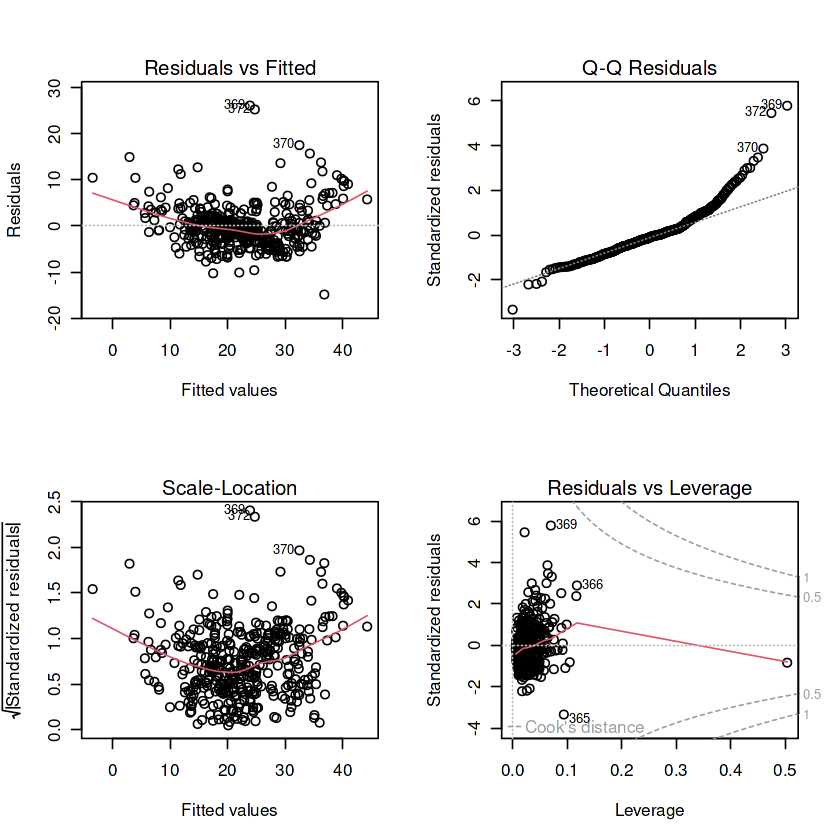

In [94]:
#4. DIAGNOSTICS & SELECTION

# Diagnostics for stepwise model
par(mfrow = c(2, 2))
plot(model_step)
par(mfrow = c(1, 1))

In [96]:
install.packages("lmtest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘lmtest’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [97]:
library(lmtest)


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [99]:
install.packages("car")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘car’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [100]:
library(car)


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [101]:
# Residual tests
shapiro.test(residuals(model_step))
bptest(model_step)
vif(model_step)


	Shapiro-Wilk normality test

data:  residuals(model_step)
W = 0.90904, p-value = 6.48e-15



	studentized Breusch-Pagan test

data:  model_step
BP = 49.81, df = 11, p-value = 6.771e-07


CRIM       ZN     CHAS      NOX       RM      DIS      RAD      TAX 
1.960585 2.292024 1.060583 3.815162 1.842033 3.574933 6.849181 7.032249 
 PTRATIO        B    LSTAT 
1.736955 1.297571 2.721820

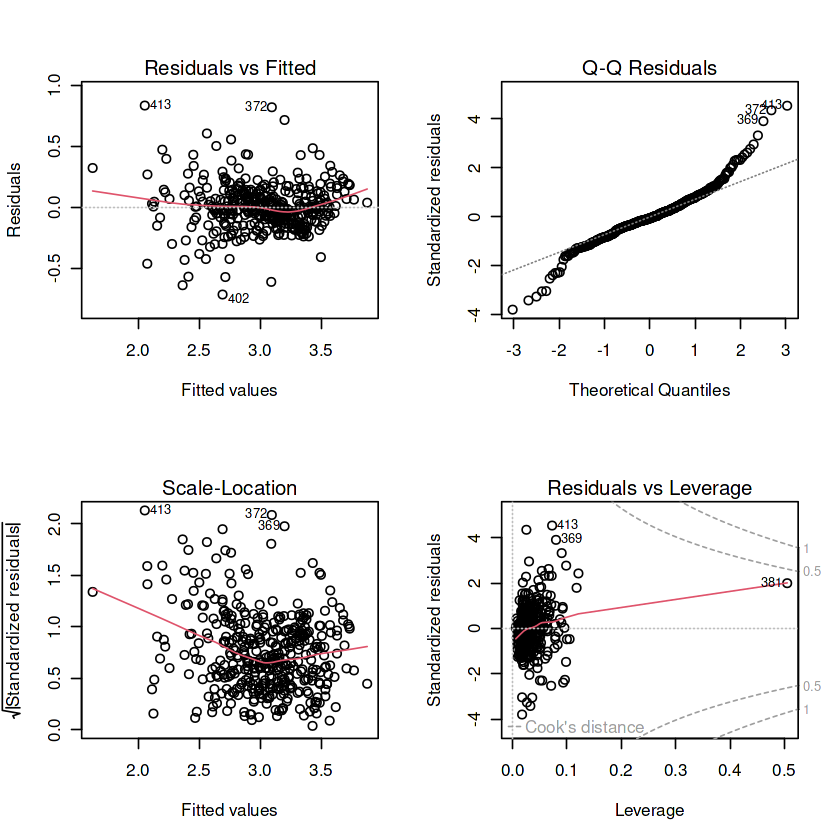

In [102]:
# Diagnostics for log model
par(mfrow = c(2, 2))
plot(model_log)
par(mfrow = c(1, 1))

In [103]:
shapiro.test(residuals(model_log))
bptest(model_log)
vif(model_log)


	Shapiro-Wilk normality test

data:  residuals(model_log)
W = 0.95018, p-value = 1.775e-10



	studentized Breusch-Pagan test

data:  model_log
BP = 59.495, df = 13, p-value = 6.466e-08


CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS 
1.967786 2.348070 4.134574 1.089439 4.520475 1.907346 3.060503 4.077794 
     RAD      TAX  PTRATIO        B    LSTAT 
7.413925 8.755422 1.797517 1.304454 3.008114

In [107]:
#5. MODEL COMPARISON
  
  # Predictions on test set
  pred_full  <- predict(model_full, newdata = test)
pred_step  <- predict(model_step, newdata = test)
pred_poly  <- predict(model_poly, newdata = test)
pred_log   <- exp(predict(model_log, newdata = test))  # back-transform

In [109]:
model_comp <- data.frame(
  Model = c("Full", "Stepwise", "Polynomial", "Log-Linear"),
  RMSE  = c(rmse(test$MEDV, pred_full),
            rmse(test$MEDV, pred_step),
            rmse(test$MEDV, pred_poly),
            rmse(test$MEDV, pred_log)),
  R2    = c(cor(test$MEDV, pred_full)^2,
            cor(test$MEDV, pred_step)^2,
            cor(test$MEDV, pred_poly)^2,
            cor(test$MEDV, pred_log)^2)
)
print(model_comp)

       Model     RMSE        R2
1       Full 5.005110 0.7634984
2   Stepwise 5.001367 0.7642961
3 Polynomial 4.579774 0.7954822
4 Log-Linear 4.820772 0.7927911


In [110]:
# Cross-validation for stepwise model
train_control <- trainControl(method = "cv", number = 10)
cv_step <- train(
  MEDV ~ .,
  data = train[, all.vars(formula(model_step))],
  method = "lm",
  trControl = train_control
)
cv_step$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,4.751789,0.7373072,3.378457,1.13426,0.09333923,0.5256538


In [111]:
#6. FINAL MODEL

# Choosing log-linear as final model for better residuals
final_model <- model_log
summary(final_model)


Call:
lm(formula = log(MEDV) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71618 -0.09273 -0.01193  0.09007  0.83208 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.1915075  0.2263090  18.521  < 2e-16 ***
CRIM        -0.0105160  0.0017243  -6.099 2.56e-09 ***
ZN           0.0012001  0.0006137   1.956   0.0512 .  
INDUS        0.0025757  0.0028221   0.913   0.3620    
CHAS         0.0998102  0.0389305   2.564   0.0107 *  
NOX         -0.7757262  0.1728954  -4.487 9.51e-06 ***
RM           0.0895282  0.0185086   4.837 1.89e-06 ***
AGE         -0.0001937  0.0005855  -0.331   0.7410    
DIS         -0.0525017  0.0090831  -5.780 1.52e-08 ***
RAD          0.0154496  0.0030177   5.120 4.80e-07 ***
TAX         -0.0007191  0.0001695  -4.241 2.77e-05 ***
PTRATIO     -0.0383280  0.0058777  -6.521 2.15e-10 ***
B            0.0003180  0.0001263   2.518   0.0122 *  
LSTAT       -0.0280675  0.0022859 -12.279  < 2e-16 ***
---
Sig

In [112]:
# Predictions and metrics
final_train_pred <- exp(predict(final_model, train))
final_test_pred  <- exp(predict(final_model, test))

In [113]:
final_results <- data.frame(
  Set  = c("Train", "Test"),
  R2   = c(cor(train$MEDV, final_train_pred)^2,
           cor(test$MEDV, final_test_pred)^2),
  RMSE = c(rmse(train$MEDV, final_train_pred),
           rmse(test$MEDV, final_test_pred))
)
print(final_results)

    Set        R2     RMSE
1 Train 0.7805543 4.259877
2  Test 0.7927911 4.820772


In [114]:
#7. INTERPRETATION

coefs <- coef(final_model)

cat("\nLog-linear model interpretation examples:\n")
cat("rm: a one-unit increase in rooms increases median house value by approximately",
    round((exp(coefs["rm"]) - 1) * 100, 2), "%, holding other variables constant.\n")
cat("lstat: a 1% increase in lower-status population decreases median house value by approximately",
    round((exp(coefs["lstat"]) - 1) * 100, 2), "%.\n")


Log-linear model interpretation examples:
rm: a one-unit increase in rooms increases median house value by approximately NA %, holding other variables constant.
lstat: a 1% increase in lower-status population decreases median house value by approximately NA %.


In [115]:
#8. SAVE OUTPUTS

coef_df <- as.data.frame(summary(final_model)$coefficients)
coef_df$Variable <- rownames(coef_df)
coef_df <- coef_df[, c("Variable", "Estimate", "Std. Error", "t value", "Pr(>|t|)")]

write.csv(coef_df, "final_model_coefficients.csv", row.names = FALSE)
write.csv(final_results, "final_model_metrics.csv", row.names = FALSE)

cat("\n DONE: Code executed successfully. All outputs saved. \n")


 DONE: Code executed successfully. All outputs saved. 
